# 回答以下理论题目
## 2.1 What conditions are required to make the BFS return the optimal solution ?
 Ans: With the cost function, a sort is made after each search, and the path with the least cost will always be chosen first.

## 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
Ans: With DFS, we cannot find the optimal solution, however, we can use iterative DFS to solve this problem because it will iteratively explore all states with limiting the maximum depth.

## 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
Ans: When there is limited space, DFS maybe better choice than BFS for the space compelxity of DFS is much less than that of the VFS.
    However, in other conditions, BFS may be optimal while DFS cannot be optiomal unless using iterative DFS.

## 2.4 When can we use machine learning ?
Ans: When we want to know the underlying rule in plenty of data that is hard to understand by people and take advantage of it to let computer to make choice with new data.

## 2.5 What is the gradient of a function ?
Ans: Gradient of a function is the changing rate of the dependent variable (eg, y) when the independent variable (eg, x) is changing.
    Of cource, in math, there is a term called derivative.

## 2.6 How can we find the maximum value of a function using the information of gradient ?
Ans: With gradient, we can know the changing direction of dependent variable, and change the independent variable towards the plus gradient step by step,.
    After reaching a point,the fradient may decrease, then we can say the point is a maximum point where the function can achieve maximum value.

# Beijing Subway

## Get Beijing subway data from web

### Getting the geography location of each  station 

In [75]:
import json
import requests
from bs4 import BeautifulSoup
import math

s = requests.Session()
s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'

response = s.get('https://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json', verify=False)
response.encoding = 'gb18030'

data = json.loads(response.content)


/Users/wangqin/anaconda2/envs/py36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [24]:
data['l'][0]['st'][0]['sl']

'116.163167,39.923620'

In [33]:
from collections import defaultdict

def get_GEO_location_from_json_dict(json_list):
    info_list = json_list['l']
    
    station_geo_loc = defaultdict(list)
    for i in range(len(info_list)):
        clear_info_list = info_list[i]['st']
        
        for j in range(len(clear_info_list)):
            station = clear_info_list[j]['n']
            loc = [float(x) for x in clear_info_list[j]['sl'].split(',')]
            station_geo_loc[station] = loc
            
    return dict(station_geo_loc)

station_GEO_coord = get_GEO_location_from_json_dict(data)
station_GEO_coord

{'金安桥': [116.163167, 39.92362],
 '四道桥': [116.13401, 39.91603],
 '桥户营': [116.125809, 39.912383],
 '上岸': [116.122225, 39.905138],
 '栗园庄': [116.123254, 39.89578],
 '小园': [116.114443, 39.890465],
 '石厂': [116.100334, 39.889378],
 '苹果园': [116.177388, 39.926727],
 '古城': [116.190337, 39.90745],
 '八角游乐园': [116.212684, 39.907442],
 '八宝山': [116.235948, 39.90744],
 '玉泉路': [116.252888, 39.907433],
 '五棵松': [116.273987, 39.907456],
 '万寿路': [116.294765, 39.907474],
 '公主坟': [116.309919, 39.907469],
 '军事博物馆': [116.321459, 39.907422],
 '木樨地': [116.337583, 39.907379],
 '南礼士路': [116.352583, 39.907234],
 '复兴门': [116.356866, 39.907242],
 '西单': [116.374072, 39.907383],
 '天安门西': [116.391278, 39.907472],
 '天安门东': [116.401216, 39.90778],
 '王府井': [116.411571, 39.908069],
 '东单': [116.41848, 39.908325],
 '建国门': [116.435806, 39.908501],
 '永安里': [116.450497, 39.908454],
 '国贸': [116.461841, 39.909104],
 '大望路': [116.475783, 39.908287],
 '四惠': [116.495456, 39.908749],
 '四惠东': [116.515664, 39.908495],
 '积水潭': [116.373126

### Computing_distance_between_two_stations

In [31]:
def get_geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [80]:
def get_distance_between_stations(station1, station2):
    return get_geo_distance(station_GEO_coord[station1], station_GEO_coord[station2])

# get_distance_between_stations('奥体中心', '天安门东')

### Grab stations of Beijing subway

In [36]:
import requests
from bs4 import BeautifulSoup

In [37]:
s = requests.Session()
s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
response = s.get('https://www.bjsubway.com/station/xltcx', verify=False)
response.encoding = 'gb18030'
html = response.text
soup = BeautifulSoup(html, 'html.parser')

/Users/wangqin/anaconda2/envs/py36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/wangqin/anaconda2/envs/py36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [38]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>站点及周边信息 | 北京地铁官方网站</title>
<meta content="北京地铁官方网站,地铁线路图,站内信息,站点首末车时间,公交换乘,服务设施,一卡通网点,站内立体示意图" name="keywords"/>
<meta content="北京地铁线路查询，站点详细信息查询，能够更高效的获取地铁出行路线，得知指定站点的详细信息，使出行更加方便快捷。" name="description"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/subway/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/subway/css/search.css" rel="stylesheet" type="text/css"/>
<script src="/subway/js/jquery.js" type="text/javascript"></script>
<script src="/subway/js/SubwayManager_min.js" type="text/javascript"></script>
</head>
<body>
<div class="wrap">
<script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com/hm.js?01cf1cc88df5ecf7e381641

In [59]:
from collections import defaultdict
import re

div = soup.find_all('div', attrs={'class': ['line_name', 'station']})#.text.split(',')
line_station_info = list(div)
line_station_info = [str(i) for i in line_station_info]

line_contains_station = defaultdict(list)
for i in range(len(line_station_info)):
    _line = line_station_info[i]
    if 'subway_' in _line:
        line_name = re.findall('>\w+</div>', _line)[0].strip().split('<')[0].split('>')[1]
        line_contains_station[line_name] = [[]]
        
        line_name2 = line_name
        for j in range(i + 1, len(line_station_info)):
            _line2 = line_station_info[j]
            while 'subway_' in _line2:
                line_name2 = re.findall('>\w+</div>', _line2)[0].strip().split('<')[0].split('>')[1]
                break
            else:
                if '"station"' in _line2 and line_name == line_name2:
                    Station = re.findall('>\w+<', str(_line2))[0].split('<')[0].split('>')[1]
#                     print(Station)
                    if Station in station_GEO_coord.keys(): # due to the small difference between two data source, we remove some station
                        line_contains_station[line_name][0].append(Station) # start to end station
                    
for _key in line_contains_station.keys():
    line_contains_station[_key].append(list(reversed(line_contains_station[_key][0]))) # add end to start station
    
print(line_contains_station['6号线'])


[['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'], ['潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '朝阳门', '东四', '南锣鼓巷', '北海北', '平安里', '车公庄', '车公庄西', '白石桥南', '花园桥', '慈寿寺', '海淀五路居', '田村', '廖公庄', '西黄村', '杨庄', '苹果园', '金安桥']]


In [60]:
station_connections = defaultdict(list)
for _key in line_contains_station.keys():
    for _line in line_contains_station[_key]:
        for i in range(len(_line) - 1):
            station1 = _line[i]
            
            for j in [i + 1]:
                station2 = _line[j]
                station_connections[station1].append(station2)

print(station_connections['苹果园'])

['古城', '杨庄', '金安桥']


### construct BFS searching 

In [61]:
def bfs_with_strategy(searching_dict, origin, destination, strategy):
    pathes = [[origin]]
#     visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        successors = searching_dict[frontier]
        
        for city in successors:
            if city in path:
                pass
            else:
                new_path = path + [city]
                pathes.append(new_path)
        
        pathes = strategy(pathes) #sorted(pathes, key = lambda x: strategy(x) for x in pathes) #

        if pathes and pathes[0][-1] == destination:
            return 'The transferring number is {0} , and the stationes are: '.format(get_line_transferring_times(pathes[0])) + ' -> '.join(pathes[0])
#             return pathes
#         visited.add(frontier)

bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = lambda x:x)

'The transferring number is 3 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 什刹海 -> 南锣鼓巷 -> 东四 -> 灯市口 -> 东单 -> 王府井 -> 天安门东'

In [70]:
station_corresponding_line = defaultdict(list)

def get_station_line_info(line_contains_station):
    for _key in line_contains_station.keys():
        for _line in line_contains_station[_key][0]:
            station_corresponding_line[_line].append(_key)
            
    return station_corresponding_line

station_corresponding_line = dict(get_station_line_info(line_contains_station))
# print(station_corresponding_line)

In [42]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [72]:
def sort_by_transferring_times(total_path):
    return sorted(total_path, key = lambda x: get_line_transferring_times(x))

In [67]:
bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = sort_by_station_number_and_transferring_times2)

'The transferring number is 2 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 安定门 -> 雍和宫 -> 东直门 -> 东四十条 -> 朝阳门 -> 建国门 -> 东单 -> 王府井 -> 天安门东'

In [93]:
def get_path_distance(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_distance_between_stations(path[i], path[i + 1])
    return distance

In [81]:
def sort_by_distance(total_path):
    return sorted(total_path, key = lambda x: get_path_distance(x))

In [62]:
def get_line_transferring_times(PATH):
    transferring_lines = []

    for i in range(len(PATH)):
        _station = PATH[i]
        if i == 0:
            transferring_lines.append(station_corresponding_line[_station][0])
        elif i == 1 and len(station_corresponding_line[PATH[0]]) > 1:
            previous_station = PATH[i - 1]
            transferring_lines = []
            transferring_lines.append(intersection(station_corresponding_line[_station], station_corresponding_line[previous_station])[0])
            transferring_lines.append(intersection(station_corresponding_line[_station], station_corresponding_line[previous_station])[0])
        else:
            previous_station = PATH[i - 1]
            transferring_lines.append(intersection(station_corresponding_line[_station], station_corresponding_line[previous_station])[0])
    transferring_lines = list(set(transferring_lines))
    transferring_lines_times = len(transferring_lines) - 1
    
    return transferring_lines_times

line1 = ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']
line2 = line_contains_station['2号线'][0]
sort_by_transferring_times([line1, line2])

[['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 ['西直门',
  '积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄']]

### Testing on example

In [63]:
bfs_with_strategy(station_connections, '苹果园', '长阳', strategy = sort_by_transferring_times)

'The transferring number is 2 , and the stationes are: 苹果园 -> 古城 -> 八角游乐园 -> 八宝山 -> 玉泉路 -> 五棵松 -> 万寿路 -> 公主坟 -> 军事博物馆 -> 北京西站 -> 六里桥东 -> 六里桥 -> 七里庄 -> 丰台东大街 -> 丰台南路 -> 科怡路 -> 丰台科技园 -> 郭公庄 -> 大葆台 -> 稻田 -> 长阳'

In [64]:
bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = sort_by_transferring_times)

'The transferring number is 2 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 安定门 -> 雍和宫 -> 东直门 -> 东四十条 -> 朝阳门 -> 建国门 -> 东单 -> 王府井 -> 天安门东'

In [82]:
bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = sort_by_distance)

'The transferring number is 3 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 什刹海 -> 南锣鼓巷 -> 东四 -> 灯市口 -> 东单 -> 王府井 -> 天安门东'

In [65]:
def sort_by_station_number_and_transferring_times(total_path):
    return sorted(total_path, key = lambda x: (len(x), get_line_transferring_times(x))) # fewer stationes is first

In [51]:
def sort_by_station_number_and_transferring_times2(total_path):
    return sorted(total_path, key = lambda x: (get_line_transferring_times(x), len(x))) # fewer transferring times is first

In [91]:
def sort_by_station_number_and_transferring_times_and_distance(total_path):
    return sorted(total_path, key = lambda x: (get_path_distance(x), len(x), get_line_transferring_times(x))) # fewer transferring times is first

In [66]:
bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = sort_by_station_number_and_transferring_times)

'The transferring number is 3 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 什刹海 -> 南锣鼓巷 -> 东四 -> 灯市口 -> 东单 -> 王府井 -> 天安门东'

In [67]:
bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = sort_by_station_number_and_transferring_times2)

'The transferring number is 2 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 安定门 -> 雍和宫 -> 东直门 -> 东四十条 -> 朝阳门 -> 建国门 -> 东单 -> 王府井 -> 天安门东'

In [94]:
bfs_with_strategy(station_connections, '奥体中心', '天安门东', strategy = sort_by_station_number_and_transferring_times_and_distance)

'The transferring number is 3 , and the stationes are: 奥体中心 -> 北土城 -> 安华桥 -> 安德里北街 -> 鼓楼大街 -> 什刹海 -> 南锣鼓巷 -> 东四 -> 灯市口 -> 东单 -> 王府井 -> 天安门东'

### Plotting station networks

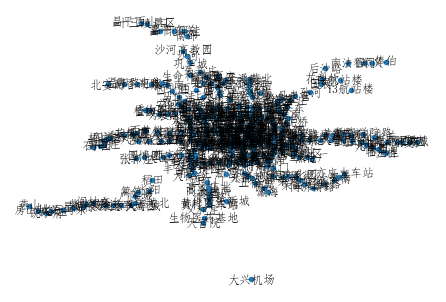

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体  
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 
    
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_GEO_coord.keys()))
nx.draw(station_graph, station_GEO_coord, with_labels = True, node_size = 20)

/Users/wangqin/anaconda2/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


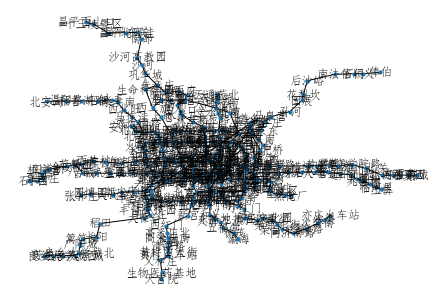

In [69]:
station_connections_graph = nx.Graph(station_connections)
nx.draw(station_connections_graph, station_GEO_coord, with_labels = True, node_size = 10)

### Difference between my results and Baidu Map or Gaode Map.

**Result Summary**

The searching results of mine shows that the optimal route is transferring 2 times and passing 13 stations for the fewest stations or shortest distance of a path.

The searching results of Baidu Map shows that the optimal route is transferring 2 times and passing 12 stations, while it takes 41 minutes.

The searching results of Gaode Map shows that the optimal route is transferring 2 times and passing 13 stations, while it takes 36 minutes.


**Possible exploanation**

In this case, I take stations, total distance, and transferring times into account. 

It seems that the Baidu Map thinks fewer transferring times and stations is more important regardless of time cost.
In contrast, the Gaode Map puts less time spending on a more crucial status.

Overall, the actual situation is more complex than we can easily imagine, including the jam degree in different time of a day/month/year, which can lead to different recommendation. To make better recommendation, much more work has to be done.